# NLP CourseWork

The Patronizing and Condescending Language Detection Task is based on the paper Don't Patronize Me! An annotated Dataset with Patronizing and Condescending Language Towards Vulnerable Communities (Perez-Almendros et al., 2020).

The aim of this task is to identify PCL, and to categorize the linguistic techniques used to express it, specifically when referring to communities identified as being vulnerable to unfair treatment in the media.

Participants are provided with sentences in context (paragraphs), extracted from news articles, in which one or several predefined vulnerable communities are mentioned. 

About the task:
The minimum linguistic unit in this task is the paragraph (i.e., sentences in context). Paragraphs are extracted from news articles from a range of outlets. These paragraphs may contain one or more instances of PCL targeting a set of predefined vulnerable communities. This challenge is divided into two subtasks.

Subtask 1: Binary classification.
Given a paragraph, a system must predict whether or not it contains any form of PCL.
Examples
In the last week of April, 1,100 migrants died or went missing off Libya in nine separate incidents. - NO PCL

People across Australia ordered pizzas to be delivered on Saturday night, with the ample leftovers donated to local homeless shelters. - PCL


Subtask 2: Multi-label classification.
Given a paragraph, a system must identify which PCL categories express the condescension. Our PCL taxonomy has been defined based on previous works on PCL. We consider the following categories:
Unbalanced power relations. The author distances themselves from the community or the situation they are talking about and expresses the will, capacity or responsibility to help those in need. It is also present when the author entitles themselves to give something positive to others in a more vulnerable situation, especially when what the author concedes is a right which they do not have any authority to decide to give. 

* Shallow solution. A simple and superficial charitable action by the privileged community is presented either as life-saving/life-changing for the unprivileged one or as a solution for a deep-rooted problem.

* Presupposition. When the author assumes a situation as certain without having all the information or generalises their or somebody else’s experience as a categorical truth without presenting a valid, trustworthy source for it (e.g. a research work or survey). The use of stereotypes or clichés is also considered to be examples of presupposition.
Authority voice. When the author stands themselves as a spokesperson of the group, or ex-plains or advises the members of a community about the community itself or a specific situation they are living.


* Metaphor. They can conceal PCL, as they cast an idea in another light, making a comparison between unrelated concepts, often with the objective of depicting a certain situation in a softer way. For the annotation of this dataset, euphemisms are considered as an example of metaphors.


* Compassion. The author presents the vulnerable individual or community as needy, raising a feeling of pity and compassion from the audience towards them. It is commonly characterized by the use of flowery wording that does not provide information, but the author enjoys the detailed and poetic description of the vulnerability.

* The poorer, the merrier. The text is focused on the community, especially on how the vulnerability makes them better (e.g. stronger, happier or more resilient) or how they share a positive attribute just for being part of a vulnerable community. People living in vulnerable situations have values to admire and learn from. The message expresses the idea of vulnerability as something beautiful o or poetic. We can think of the typical example of ‘poor people are happier because they don’t have material goods’. 

Examples
*BUSINESSMAN Norberto Quisumbing Jr. of the Norkis Group of Companies has a challenge for families who can spare some of what they have: why not adopt poor families and help them break the cycle of poverty?
why not adopt poor families and help them break the cycle of poverty? - Unbalanced_power_relations
adopt poor families - Shallow_solution
break the cycle of poverty - Metaphor


* Iain Duncan-Smith has made his feelings about benefits claimants clear: poor families are to be given pre-paid cards, loaded with payments, to make sure they spend the money on food, rather than their "self-destructive habits".


* Iain Duncan-Smith has made his feelings about benefits claimants clear: poor families are to be given pre-paid cards, loaded with payments, to make sure they spend the money on food, rather than their "self-destructive habits" - Authority_voice


poor families are to be given pre-paid cards, loaded with payments - Unbalanced_power_relations
to make sure they spend the money on food, rather than their "self-destructive habits" - Presupposition
poor families are to be given pre-paid cards, loaded with payments - Shallow_solution
 

### Binary classification.
 Given a paragraph, a system must predict whether or not it contains any form of PCL.

https://aclanthology.org/2020.coling-main.518.pdf
See paper for more details on the data set


## 1. Import the relevant libraries

In [3]:
!pip install simpletransformers
!pip install tensorboardx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [4]:
import random
import os
from urllib import request

#Imports for Transformers
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel, MultiLabelClassificationArgs
from urllib import request
import pandas as pd
import logging
import torch
torch.manual_seed(42)
from collections import Counter
from ast import literal_eval

# Resources

In order to run this notebook, you first need the following: 

## The _Don't Patronize Me!_ dataset

Files contained in the _Don't Patronize Me!_ data file, which you can access from [here](https://github.com/Perez-AlmendrosC/dontpatronizeme) (you need to fill a short form and it will be sent to you).

## The `dont_patronize_me.py` module

You can get this file by running the cell below.

In [ ]:
# Mount the notebook 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# prepare logger
logging.basicConfig(level=logging.INFO)

transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# check gpu
cuda_available = torch.cuda.is_available()

print('Cuda available? ',cuda_available)

Cuda available?  True


In [7]:
if cuda_available:
  import tensorflow as tf
  # Get the GPU device name.
  device_name = tf.test.gpu_device_name()
  # The device name should look like the following:
  if device_name == '/device:GPU:0':
      print('Found GPU at: {}'.format(device_name))
  else:
      raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


## The official scorer

The script `evaluation.py` can also be obtained by running the cell below:

In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


At this point, your left pane on Google Colab should look like this:

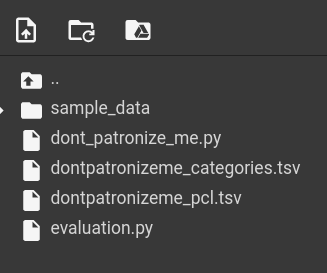

In [ ]:
from dont_patronize_me import DontPatronizeMe
# Initialize a dpm (Don't Patronize Me) object.
# It takes two areguments as input: 
# (1) Path to the directory containing the training set files, which is the root directory of this notebook.
# (2) Path to the test set, which will be released when the evaluation phase begins. In this example, 
# we use the dataset for Subtask 1, which the code will load without labels.

#Use this if running on colab
dpm = DontPatronizeMe('/content/drive/MyDrive/NLPClassification_40', None)

#Use this if not running on colab
# dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

# Load Subtask 1 data

Note that the original dataset contains fine-grained tags (0 to 4, both inclusive). The interface we provide collapses them into binary labels, which is the labeling we use for the task.

In [ ]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
train_df=dpm.train_task1_df
train_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0


Subtask 1: Binary classification. Given a paragraph, a system must predict whether or not it contains any form of PCL. 


# 1. Data analysis

In [ ]:
# Get length of the training set
lenght=len(train_df)
print(f'The lenght of the training set is {lenght}')

The lenght of the training set is 10469


In [ ]:
train_df['label'].value_counts()
print(f'The number of examples with label 0 is {train_df["label"].value_counts()[0]}')
print(f'The number of examples with label 1 is {train_df["label"].value_counts()[1]}')

The number of examples with label 0 is 9476
The number of examples with label 1 is 993


In [ ]:
train_df['orig_label'].value_counts()
print(f'The number of examples with label 0 is {train_df["orig_label"].value_counts()[0]}')
print(f'The number of examples with label 1 is {train_df["orig_label"].value_counts()[1]}')
print(f'The number of examples with label 2 is {train_df["orig_label"].value_counts()[2]}')
print(f'The number of examples with label 3 is {train_df["orig_label"].value_counts()[3]}')
print(  f'The number of examples with label 4 is {train_df["orig_label"].value_counts()[4]}')
print(f'Labels 0 and 1 are combined to form binary label 0 -> Not patronizing')
print(f'Labels 2, 3, and 4 are combined to form binary label 1 -> Patronizing')

The number of examples with label 0 is 8529
The number of examples with label 1 is 947
The number of examples with label 2 is 458
The number of examples with label 3 is 391
The number of examples with label 4 is 144
Labels 0 and 1 are combined to form binary label 0 -> Not patronizing
Labels 2, 3, and 4 are combined to form binary label 1 -> Patronizing


In [ ]:
train_df['keyword'].value_counts()

migrant          1089
in-need          1082
vulnerable       1080
homeless         1077
women            1070
refugee          1068
immigrant        1061
disabled         1028
hopeless         1005
poor-families     909
Name: keyword, dtype: int64

## 1.1. How frequent are the class labels?

In [ ]:
# Get the number of class labels in the training set and place them in a pandas dataframe. Calculate percentage of each class label in the training set.
import pandas as pd
labels = train_df['orig_label'].value_counts()
labels = pd.DataFrame(labels)
labels = labels.reset_index()
labels.columns = ['label', 'count']
labels['percentage'] = round(((labels['count']/labels['count'].sum())*100),2)
labels


,label,count,percentage
0,0,8529,81.47
1,1,947,9.05
2,3,458,4.37
3,4,391,3.73
4,2,144,1.38


In [ ]:
# Load the train and test set if local
# train_ids = pd.read_csv('train_semeval_parids-labels.csv')
# test_ids = pd.read_csv('dev_semeval_parids-labels.csv')

# use the below code if using Colab
trids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40/train_semeval_parids-labels.csv')
teids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40/dev_semeval_parids-labels.csv')


trids

,par_id,label
0,4341,"[1, 0, 0, 1, 0, 0, 0]"
1,4136,"[0, 1, 0, 0, 0, 0, 0]"
2,10352,"[1, 0, 0, 0, 0, 1, 0]"
3,8279,"[0, 0, 0, 1, 0, 0, 0]"
4,1164,"[1, 0, 0, 1, 1, 1, 0]"
...,...,...
8370,8380,"[0, 0, 0, 0, 0, 0, 0]"
8371,8381,"[0, 0, 0, 0, 0, 0, 0]"
8372,8382,"[0, 0, 0, 0, 0, 0, 0]"
8373,8383,"[0, 0, 0, 0, 0, 0, 0]"


## 1.2 .Understand correlation between features

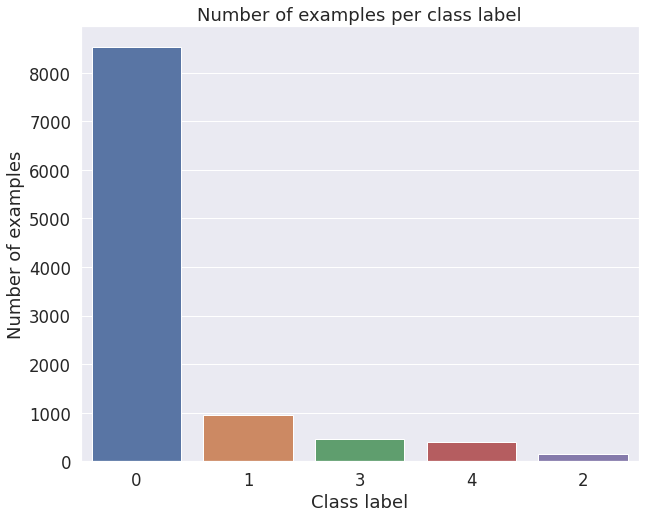

In [ ]:
# Show the correlation between the class labels and text length
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 8))
sns.barplot(x='label', y='count', data=labels)
plt.title('Number of examples per class label')
plt.xlabel('Class label')
plt.ylabel('Number of examples')
plt.show()


In [ ]:
# Create a new annotated train_df with text length for each example
annotated_train_df = train_df.copy()
annotated_train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
annotated_train_df.head()


,par_id,art_id,keyword,country,text,label,orig_label,text_length
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0,620
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0,237
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0,162
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0,162
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0,277


In [ ]:
# Create one hot vectors for each keyword in the annotated_train_df
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
annotated_train_df['keyword'] = annotated_train_df['keyword'].apply(lambda x: [x])
annotated_train_df = annotated_train_df.join(pd.DataFrame(mlb.fit_transform(annotated_train_df.pop('keyword')),
                            columns=mlb.classes_,
                            index=annotated_train_df.index))
annotated_train_df.head()

,par_id,art_id,country,text,label,orig_label,text_length,disabled,homeless,hopeless,immigrant,in-need,migrant,poor-families,refugee,vulnerable,women
0,1,@@24942188,ph,"We 're living in times of absolute insanity , ...",0,0,620,0,0,1,0,0,0,0,0,0,0
1,2,@@21968160,gh,"In Libya today , there are countless number of...",0,0,237,0,0,0,0,0,1,0,0,0,0
2,3,@@16584954,ie,"""White House press secretary Sean Spicer said ...",0,0,162,0,0,0,1,0,0,0,0,0,0
3,4,@@7811231,nz,Council customers only signs would be displaye...,0,0,162,1,0,0,0,0,0,0,0,0,0
4,5,@@1494111,ca,""""""" Just like we received migrants fleeing El ...",0,0,277,0,0,0,0,0,0,0,1,0,0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Count the number of stop words in each text column

from nltk.corpus import stopwords
stop = stopwords.words('english')
annotated_train_df['stopwords'] = annotated_train_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
annotated_train_df.head()


,par_id,art_id,country,text,label,orig_label,text_length,disabled,homeless,hopeless,immigrant,in-need,migrant,poor-families,refugee,vulnerable,women,stopwords
0,1,@@24942188,ph,"We 're living in times of absolute insanity , ...",0,0,620,0,0,1,0,0,0,0,0,0,0,46
1,2,@@21968160,gh,"In Libya today , there are countless number of...",0,0,237,0,0,0,0,0,1,0,0,0,0,14
2,3,@@16584954,ie,"""White House press secretary Sean Spicer said ...",0,0,162,0,0,0,1,0,0,0,0,0,0,7
3,4,@@7811231,nz,Council customers only signs would be displaye...,0,0,162,1,0,0,0,0,0,0,0,0,0,10
4,5,@@1494111,ca,""""""" Just like we received migrants fleeing El ...",0,0,277,0,0,0,0,0,0,0,1,0,0,14


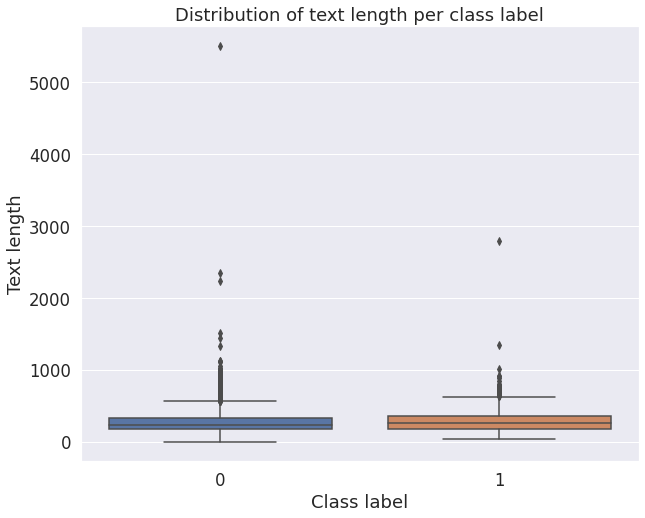

In [ ]:
#Plot the distribution of the length of the text for each class label in the annotated_train_df
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='text_length', data=annotated_train_df)
plt.title('Distribution of text length per class label')
plt.xlabel('Class label')
plt.ylabel('Text length')
plt.show()


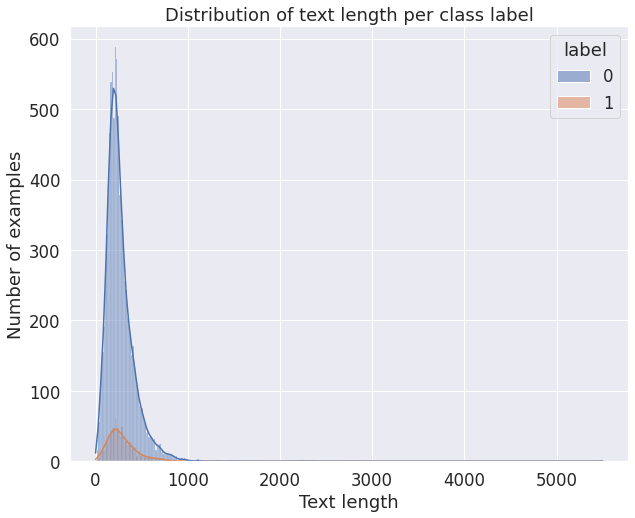

In [ ]:
# Plot the distribution of the length of the text for each class label in the annotated_train_df in a histogram
plt.figure(figsize=(10, 8))
sns.histplot(x='text_length', data=annotated_train_df, hue='label', kde=True)
plt.title('Distribution of text length per class label')
plt.xlabel('Text length')
plt.ylabel('Number of examples')
plt.show()


In [ ]:
# get the max text length from the annotated_train_df 
max_text_length = annotated_train_df['text_length'].max()
print(f'The maximum text length is {max_text_length}')

# Get the min text length from the annotated_train_df
min_text_length = annotated_train_df['text_length'].min()
print(f'The minimum text length is {min_text_length}')


The maximum text length is 5501
The minimum text length is 0


The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


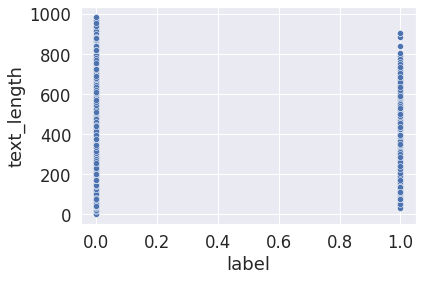

(0.04208676441589507, 1.67484547280288e-05)
SpearmanrResult(correlation=0.04349460190884137, pvalue=8.648911337348e-06)


In [ ]:
# Plot a correlation plot between the class labels and the keywords on the annotated_train_df
from scipy.stats import pearsonr, spearmanr
Threshold=1000

ax = sns.scatterplot(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold], annotated_train_df['text_length'][annotated_train_df['text_length'] <Threshold])
plt.show()

print(pearsonr(annotated_train_df['label'][annotated_train_df['text_length'] <Threshold].tolist(), annotated_train_df['text_length'][annotated_train_df['text_length'] < Threshold].tolist()))
print(spearmanr(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold].tolist(), annotated_train_df['text_length'][annotated_train_df['text_length'] < Threshold].tolist()))

In [ ]:
# Max and min number of stop words in the annotated_train_df
max_stopwords = annotated_train_df['stopwords'].max()
print(f'The maximum number of stop words is {max_stopwords}')

min_stopwords = annotated_train_df['stopwords'].min()
print(f'The minimum number of stop words is {min_stopwords}')


The maximum number of stop words is 300
The minimum number of stop words is 0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


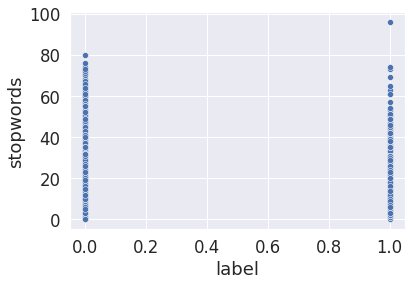

(0.08655839168646404, 7.629407297841429e-19)
SpearmanrResult(correlation=0.08543323898263332, pvalue=2.140302174785055e-18)


In [ ]:
# Show correlation between the class labels and the number of stop words in the annotated_train_df
Threshold=1000
ax = sns.scatterplot(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold], annotated_train_df['stopwords'][annotated_train_df['text_length'] <Threshold])
plt.show()

# Calculate the pearson and spearman correlation between the class labels and the number of stop words in the annotated_train_df
print(pearsonr(annotated_train_df['label'][annotated_train_df['text_length'] <Threshold].tolist(), annotated_train_df['stopwords'][annotated_train_df['text_length'] < Threshold].tolist()))
print(spearmanr(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold].tolist(), annotated_train_df['stopwords'][annotated_train_df['text_length'] < Threshold].tolist()))


### Removing stop words

In [ ]:
# Remove the stop words from the annotated_train_df and create a new column called 'text_without_stopwords' in the annotated_train_df and calculate the length of the text without stop words
annotated_train_df['text_without_stopwords'] = annotated_train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
annotated_train_df['text_without_stopwords_length'] = annotated_train_df['text_without_stopwords'].apply(lambda x: len(x))
annotated_train_df.head()


,par_id,art_id,country,text,label,orig_label,text_length,disabled,homeless,hopeless,immigrant,in-need,migrant,poor-families,refugee,vulnerable,women,stopwords,text_without_stopwords,text_without_stopwords_length
0,1,@@24942188,ph,"We 're living in times of absolute insanity , ...",0,0,620,0,0,1,0,0,0,0,0,0,0,46,"We 're living times absolute insanity , I 'm p...",452
1,2,@@21968160,gh,"In Libya today , there are countless number of...",0,0,237,0,0,0,0,0,1,0,0,0,0,14,"In Libya today , countless number Ghanaian Nig...",177
2,3,@@16584954,ie,"""White House press secretary Sean Spicer said ...",0,0,162,0,0,0,1,0,0,0,0,0,0,7,"""White House press secretary Sean Spicer said ...",134
3,4,@@7811231,nz,Council customers only signs would be displaye...,0,0,162,1,0,0,0,0,0,0,0,0,0,10,Council customers signs would displayed . Two ...,123
4,5,@@1494111,ca,""""""" Just like we received migrants fleeing El ...",0,0,277,0,0,0,0,0,0,0,1,0,0,14,""""""" Just like received migrants fleeing El Sal...",225


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


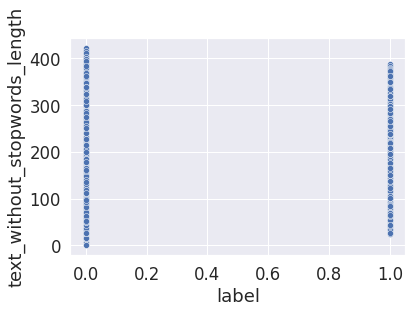

(0.012436557146741753, 0.2208843789296863)
SpearmanrResult(correlation=0.015074726000344077, pvalue=0.13783750080371915)


In [ ]:
# Plot the correlation between the class labels and the length of the text without stop words in the annotated_train_df
Threshold=500
ax = sns.scatterplot(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold], annotated_train_df['text_without_stopwords_length'][annotated_train_df['text_length'] <Threshold])

plt.show()
# Calculate the pearson and spearman correlation between the class labels and the length of the text without stop words in the annotated_train_df
print(pearsonr(annotated_train_df['label'][annotated_train_df['text_length'] <Threshold].tolist(), annotated_train_df['text_without_stopwords_length'][annotated_train_df['text_length'] < Threshold].tolist()))
print(spearmanr(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold].tolist(), annotated_train_df['text_without_stopwords_length'][annotated_train_df['text_length'] < Threshold].tolist()))


### Qualitative Assessment


Subjectivity and difficulty of the task with examples

In [ ]:
print(train_df[train_df['orig_label'] == '0']['text'][0])
 

We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism .


In [ ]:
train_df[train_df['orig_label'] == '1']['text'][8] 

'NUEVA ERA , Ilocos Norte - No family shall be homeless under the watch of the municipal government here , said town Mayor Aldrin Garvida .'

In [ ]:
train_df[train_df['orig_label'] == '2']['text'][178] 

'Jenny Neal , regional director of the Grandmothers Advocacy Network for Saskatchewan and Manitoba , displays her orange scarf at the sculpture Prairie Wind at River Landing , Thursday , November 24 , 2016 , to promote 16 days of orange to raise awareness about violence against women.Greg Pender / The StarPhoenix'

In [ ]:
train_df[train_df['orig_label'] == '3']['text'][33] 

'Fast food employee who fed disabled man becomes internet sensation'

In [ ]:
train_df[train_df['orig_label'] == '4']['text'][156] 

'We are alarmed to learn of your recently circulated proposals that would eviscerate the Lifeline program and leave many of the most vulnerable people in the country without access to affordable communications . As you are well aware , the Lifeline program provides a modest monthly subsidy of $9.25 to connect low-income Americans to phone and internet services . As broadband prices continue to soar , and affordability continues to suffer , adoption gaps remain . The Lifeline program has proven critical for poor families and people of color who are caught on the wrong side of the digital divide .'

The difference in values of each text is up for interpretation. For example, cases which are labelled as a 2 are given the label 1 for training and cases labelled as 1 are labelled as 0 for training. Therefore two very borderline cases can be classified completely differently using this system. In the example above a case could be made that the example labelled 2 is not PCL and therefore issues arrise within the dataset with regards to the difficulty of classification.

We can also discuss:
Binary classification task being undertaken on a multiclass/continuous problem where there are different levels of PCL.

# Load paragraph IDs

In [ ]:
#Use this if running on colab
from dont_patronize_me import DontPatronizeMe
dpm = DontPatronizeMe('/content/drive/MyDrive/NLPClassification_40', None)


dpm.load_task1()
# dpm.load_task2(return_one_hot=True)

In [5]:
# Use the below code if NOT using google colab
# trids = pd.read_csv('train_semeval_parids-labels.csv')
# teids = pd.read_csv('dev_semeval_parids-labels.csv')

# use the below code if using Colab
trids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40/train_semeval_parids-labels.csv')
teids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40/dev_semeval_parids-labels.csv')


trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)

data=dpm.train_task1_df

# The below dataframe shows all features of the data for task 1. 
#(Remember task 1 is a binary classification task which determines if text contains condesending or non condesending langauage)
data

NameError: ignored

# Rebuild training set (Task 1)

In [ ]:
rows = [] # will contain par_id, label and text
for idx in range(len(trids)):  
  parid = trids.par_id[idx]
  #print(parid)
  # select row from original dataset to retrieve `text` and binary label
  keyword = data.loc[data.par_id == parid].keyword.values[0]
  text = data.loc[data.par_id == parid].text.values[0]
  label = data.loc[data.par_id == parid].label.values[0]
  rows.append({
      'par_id':parid,
      'community':keyword,
      'text':text,
      'label':label
  })
trdf1 = pd.DataFrame(rows)
#This is the rearraged training set
trdf1

# Rebuild test set (Task 1)

In [ ]:
rows = [] # will contain par_id, label and text
for idx in range(len(teids)):  
  parid = teids.par_id[idx]
  #print(parid)
  # select row from original dataset
  keyword = data.loc[data.par_id == parid].keyword.values[0]
  text = data.loc[data.par_id == parid].text.values[0]
  label = data.loc[data.par_id == parid].label.values[0]
  rows.append({
      'par_id':parid,
      'community':keyword,
      'text':text,
      'label':label
  })

In [ ]:
len(rows)

In [ ]:
#test set
tedf1 = pd.DataFrame(rows)
tedf1

# RoBERTa Baseline for Task 1

In [ ]:
# Show the number of posutives and negatives in the training set
trdf1['label'].value_counts()


0    7581
1     794
Name: label, dtype: int64

In [ ]:
# downsample negative instances
pcldf = trdf1[trdf1.label==1]
npos = len(pcldf)
print(npos)

training_set1 = pd.concat([pcldf,trdf1[trdf1.label==0][:npos*2]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(trdf1[trdf1.label==0]) - len(training_set1[training_set1.label==0])}')

794
0    1588
1     794
Name: label, dtype: int64
Number of negative instances downsampled: 5993


In [ ]:
(training_set1)

,par_id,community,text,label
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1
1,4136,homeless,Durban 's homeless communities reconciliation ...,1
2,10352,poor-families,The next immediate problem that cropped up was...,1
3,8279,vulnerable,Far more important than the implications for t...,1
4,1164,poor-families,To strengthen child-sensitive social protectio...,1
...,...,...,...,...
2377,1775,refugee,Last but not the least element of culpability ...,0
2378,1776,refugee,"Then , taking the art of counter-intuitive non...",0
2379,1777,refugee,Kagunga village was reported to lack necessary...,0
2380,1778,vulnerable,"""After her parents high-profile divorce after ...",0


In [8]:
# read the new data

train_df=pd.read_csv('/content/drive/MyDrive/NLPClassification_40/back_translations_german_french_old.csv')
test_df=pd.read_csv('/content/drive/MyDrive/NLPClassification_40/dev_task1.csv')



In [9]:
train_df

,par_id,community,text,label
0,6981,vulnerable,B.C. moves to help vulnerable witnesses testif...,0
1,515,poor-families,"If implemented , it will take the medical and ...",0
2,6404,poor-families,The new minimum wage is expected to draw more ...,0
3,494,hopeless,Can ? ? ? does not help if people want to run ...,1
4,3739,refugee,50% thought Australia 's immigration levels ov...,0
...,...,...,...,...
9593,606,vulnerable,"Born a Christian , my HUMILITY and RESPECT for...",1
9594,33,disabled,Arshad said that not only did he learn many ne...,1
9595,3521,poor-families,"Kuala Lumpur : Some 85,401 hardcore poor famil...",0
9596,4520,homeless,"Browne said approximately 86 percent of the 1,...",0


In [10]:
pcldf = train_df[train_df.label==1]
npos = len(pcldf)
print(npos)
ratio=4
training_set = pd.concat([pcldf, pcldf, pcldf, train_df[train_df.label==0]], ignore_index=True)
training_set

2017


,par_id,community,text,label
0,494,hopeless,Can ? ? ? does not help if people want to run ...,1
1,9825,disabled,As Mseffer celebrates her group's progress in ...,1
2,2603,migrant,"""He said the administration had 'abused' famil...",1
3,4382,hopeless,"Hoping and trying to understand the darkness, ...",1
4,7917,poor-families,We can not talk about poverty in this nation w...,1
...,...,...,...,...
13627,8183,immigrant,"The lines are in the Javanese language , broug...",0
13628,306,migrant,""""""" We 've seen evidence that the percentage o...",0
13629,3521,poor-families,"Kuala Lumpur : Some 85,401 hardcore poor famil...",0
13630,4520,homeless,"Browne said approximately 86 percent of the 1,...",0


In [11]:
test_df

,par_id,community,text,label,length
0,4046,hopeless,We also know that they can benefit by receivin...,1,493
1,1279,refugee,Pope Francis washed and kissed the feet of Mus...,1,197
2,8330,refugee,Many refugees do n't want to be resettled anyw...,1,74
3,4063,in-need,"""Budding chefs , like """" Fred """" , """" Winston ...",1,218
4,4089,homeless,"""In a 90-degree view of his constituency , one...",1,355
...,...,...,...,...,...
2089,10462,homeless,"The sad spectacle , which occurred on Saturday...",0,230
2090,10463,refugee,""""""" The Pakistani police came to our house and...",0,172
2091,10464,disabled,"""When Marie O'Donoghue went looking for a spec...",0,203
2092,10465,women,"""Sri Lankan norms and culture inhibit women fr...",0,348


In [19]:
# Run Roberta Base case
torch.manual_seed(42)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(training_set[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(test_df.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/13632 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1704 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
Counter(preds_task1)

Counter({0: 1714, 1: 380})

In [20]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(test_df.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(test_df.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(test_df.label.values, preds_task1)))

precision: 0.5092936802973977
recall： 0.6884422110552764
f1_score: 0.5854700854700854


In [ ]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [ ]:
labels2file([[k] for k in preds_task1], 'task1.txt')

# DistilBERT model

In [19]:
# Run DistilBert Base case
task1_model_args = ClassificationArgs(num_train_epochs=2, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)

task1_model_distilbert = ClassificationModel("distilbert", 
                                  'distilbert-base-uncased',     
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)

# train model
task1_model_distilbert.train_model(training_set[['text', 'label']])
# run predictions
preds_task1_distilbert, _ = task1_model_distilbert.predict(test_df.text.tolist())

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

  0%|          | 0/13632 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1704 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1704 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [20]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(test_df.label.values, preds_task1_distilbert)))
print( 'recall： ' + str(recall_score(test_df.label.values, preds_task1_distilbert)))
print('f1_score: ' + str(f1_score(test_df.label.values, preds_task1_distilbert)))

precision: 0.5816993464052288
recall： 0.4472361809045226
f1_score: 0.5056818181818182


# XLnet 

In [23]:
# Run XLNet Base case

task1_model_args = ClassificationArgs(num_train_epochs=2, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)

task1_model_xlnet = ClassificationModel("xlnet",
                                    'xlnet-base-cased',
                                    args = task1_model_args,
                                    num_labels=2,
                                    use_cuda=cuda_available)

# train model
task1_model_xlnet.train_model(training_set[['text', 'label']])
# run predictions
preds_task1_xlnet, _ = task1_model_xlnet.predict(test_df.text.tolist())


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/13632 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1704 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 2:   0%|          | 0/1704 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [24]:
Counter(preds_task1_xlnet)

Counter({0: 1929, 1: 165})

In [25]:
# Evaluate XLNet model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(test_df.label.values, preds_task1_xlnet)))
print( 'recall： ' + str(recall_score(test_df.label.values, preds_task1_xlnet)))
print('f1_score: ' + str(f1_score(test_df.label.values, preds_task1_xlnet)))

precision: 0.6181818181818182
recall： 0.5125628140703518
f1_score: 0.5604395604395604


# Bert Model

In [14]:
# Run Bert Base case

task1_model_args = ClassificationArgs(num_train_epochs=2,
                                        no_save=True,
                                        no_cache=True,
                                        overwrite_output_dir=True)

task1_model_bert = ClassificationModel("bert",
                                    'bert-base-uncased',
                                    args = task1_model_args,
                                    num_labels=2,
                                    use_cuda=cuda_available)

# train model
task1_model_bert.train_model(training_set[['text', 'label']])
# run predictions
preds_task1_bert, _ = task1_model_bert.predict(test_df.text.tolist())




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/13632 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1704 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1704 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [15]:
# Evaluate Bert model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(test_df.label.values, preds_task1_bert)))
print( 'recall： ' + str(recall_score(test_df.label.values, preds_task1_bert)))
print('f1_score: ' + str(f1_score(test_df.label.values, preds_task1_bert)))


precision: 0.6204379562043796
recall： 0.4271356783919598
f1_score: 0.505952380952381


In [16]:
training_set.value_counts('label')

label
0    7581
1    6051
dtype: int64

# Data Preprocessing
1. Data augmentation
https://neptune.ai/blog/data-augmentation-nlp

data augmentation strategies by perturbing observations in different ways that are commonly used for Natural Language Processing (NLP) tasks:

* 1.1. Random Deletion: Randomly delete a word from a sentence with a certain probability. This helps to train the model to be more robust to missing information.

* 1.2. Random Swap: Randomly swap the positions of two adjacent words in a sentence. This helps the model to learn more about the relationships between words and their order in a sentence.

* 1.3. Random Insertion: Randomly insert a new word into a sentence at a random position. This helps the model to learn more about the context in which words appear.

* 1.4. Synonym Replacement: Replace a word with a synonym. This helps the model to learn more about the semantic relationships between words.

* 1.5. Antonym Replacement: Replace a word with its antonym. This helps the model to learn more about the contrastive relationships between words.

* 1.6. Random Rotation: Rotate a sentence by a certain degree (e.g., 90 degrees) to simulate different perspectives of the same sentence.

* 1.7. Text Style Transfer: Convert a sentence to a different style (e.g., from formal to informal) to simulate variation in language use.

These data augmentation strategies can be applied individually or in combination to create a more diverse training dataset. By training on a larger and more diverse dataset, the model can learn to generalize better and perform better on unseen data.


### 1.1. Back Translation

In [ ]:
!pip install googletrans
!pip install -U deep-translator


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 9.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=f580104e4d94c7ed09980bf332ba01fc768443b70700454040f70b85d6f0bca2
  Stored in directory: /root/.cache/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.7 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
trdf1

,par_id,community,text,label
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1
1,4136,homeless,Durban 's homeless communities reconciliation ...,1
2,10352,poor-families,The next immediate problem that cropped up was...,1
3,8279,vulnerable,Far more important than the implications for t...,1
4,1164,poor-families,To strengthen child-sensitive social protectio...,1
...,...,...,...,...
8370,8380,refugee,Rescue teams search for survivors on the rubbl...,0
8371,8381,hopeless,The launch of ' Happy Birthday ' took place la...,0
8372,8382,homeless,"The unrest has left at least 20,000 people dea...",0
8373,8383,hopeless,You have to see it from my perspective . I may...,0


In [ ]:
import pandas as pd
from googletrans import Translator

In [ ]:
import pandas as pd
from googletrans import Translator
from deep_translator import GoogleTranslator


def back_translate(df, orig_lang='en', dest_lang='fr'):
    # Load the data
    df = df 

    # Get the examples with label = 1
    label_1 = df[df["label"] == 1]

    # Initialize the Translator
    translator = Translator()

    # Create a list to store the translated text
    translated_text = []

    # Loop over the examples with label = 1
    for index, row in label_1.iterrows():
      # Translate the text from English to French
      # translated = translator.translate(row["text"], dest="fr").text
      translated=GoogleTranslator(source='en', target='fr').translate(row["text"]) 

      # Translate the text back from French to English
      # back_translated = translator.translate(translated, dest="en").text
      back_translated=GoogleTranslator(source='fr', target='en').translate(translated) 
      # Add the back-translated text to the list
      translated_text.append(back_translated)

    # Add the back-translated text to the original dataframe
    label_1["back_translated_text"] = translated_text

    # Concatenate the original dataframe and the back-translated dataframe
    df = pd.concat([df, label_1])

    return label_1



#### Back translation french

In [ ]:
label_1= back_translate(trdf1)


KeyboardInterrupt: ignored

In [ ]:
# # Trying with new translator
# import pandas as pd
# from googletrans import Translator
# from deep_translator import GoogleTranslator

# # Load the data
# df = trdf1 #pd.read_csv("data.csv")

# # Get the examples with label = 1
# label_1 = df[df["label"] == 1]

# # Initialize the Translator
# translator = Translator()

# # Create a list to store the translated text
# translated_text = []

# # Loop over the examples with label = 1
# for index, row in label_1.iterrows():
#     # Translate the text from English to French
#     # translated = translator.translate(row["text"], dest="fr").text
#     translated=GoogleTranslator(source='en', target='fr').translate(row["text"]) 

#     # Translate the text back from French to English
#     # back_translated = translator.translate(translated, dest="en").text
#     back_translated=GoogleTranslator(source='fr', target='en').translate(translated) 
#     # Add the back-translated text to the list
#     translated_text.append(back_translated)

# # Add the back-translated text to the original dataframe
# label_1["back_translated_text"] = translated_text

# # Concatenate the original dataframe and the back-translated dataframe
# df = pd.concat([df, label_1])

# Label_1_cleaned = label_1.drop(['text'], axis=1)

# #rename the column back_translated_text to text
# Label_1_cleaned.rename(columns = {'back_translated_text':'text'}, inplace = True)
# # Concatenate Label_1_cleaned below the training_set1
# training_set1_backtranslate_french = pd.concat([trdf1, Label_1_cleaned])
# training_set1_backtranslate_french


In [ ]:
# Adding in the new data to the train set
Label_1_cleaned = label_1.drop(['text'], axis=1)

#rename the column back_translated_text to text
Label_1_cleaned.rename(columns = {'back_translated_text':'text'}, inplace = True)
# Concatenate Label_1_cleaned below the training_set1
training_set1_backtranslate_french = pd.concat([trdf1, Label_1_cleaned])


# Show the minority class from training_set1
training_set1_backtranslate_french[training_set1_backtranslate_french["label"] == 1]
# Print the number of examples in the minority class and the majority class
print("Number of examples in the minority class:", len(training_set1_backtranslate_french[training_set1_backtranslate_french["label"] == 1]))
print("Number of examples in the majority class:", len(training_set1_backtranslate_french[training_set1_backtranslate_french["label"] == 0]))
duplicates= training_set1_backtranslate_french[training_set1_backtranslate_french["label"] == 1].text.duplicated().sum()
print("Number of duplicates in the minority class:", duplicates)



Number of examples in the minority class: 1588
Number of examples in the majority class: 7581
Number of duplicates in the minority class: 0


In [ ]:
label_1

,par_id,community,text,label,back_translated_text
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1,"The program saw around 150,000 children from p..."
1,4136,homeless,Durban 's homeless communities reconciliation ...,1,Durban Homeless Communities Reconciliation Lun...
2,10352,poor-families,The next immediate problem that cropped up was...,1,The immediate problem that arose next was how ...
3,8279,vulnerable,Far more important than the implications for t...,1,Far more important than the implications for t...
4,1164,poor-families,To strengthen child-sensitive social protectio...,1,Strengthen child-friendly social protection sy...
...,...,...,...,...,...
789,873,poor-families,Citing the fact that these kids who died at Go...,1,Citing the fact that those children who died a...
790,10070,disabled,Fern ? ndez was a well-known philanthropist wh...,1,Fern? ndez was a well-known philanthropist who...
791,6484,homeless,"Touched much by their plight , Commanding Offi...",1,"Deeply touched by their plight, the Commanding..."
792,6249,women,She reiterated her ministry 's commitment to p...,1,She reiterated her ministry's commitment to pu...


In [ ]:
# display  row 5 from the dataframe
label_1.iloc[0]['text']



'The scheme saw an estimated 150,000 children from poor families being sent to parts of the British Empire between 1920 and 1974 , by religious orders and charities who said they would lead better lives .'

In [ ]:
label_1.iloc[0]['back_translated_text']

'Durban Homeless Communities Reconciliation Luncheon'

In [ ]:
# Calculate the similarity between text and back_translated_text in the dataframe df using the cosine similarity
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_sentences(sentence1, sentence2):
    # create CountVectorizer object to convert text to numerical features
    vectorizer = CountVectorizer().fit_transform([sentence1, sentence2])
    # compute cosine similarity between the two sentences
    cosine_sim = cosine_similarity(vectorizer)[0][1]
    return cosine_sim

# Add the similarity scores to the dataframe label_1 using the function cosine_similarity_sentences
label_1["similarity_score"] = label_1.apply(lambda x: cosine_similarity_sentences(x["text"], x["back_translated_text"]), axis=1)
label_1




C:\Users\Joshan\AppData\Local\Temp\ipykernel_20948\3334309835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_1["similarity_score"] = label_1.apply(lambda x: cosine_similarity_sentences(x["text"], x["back_translated_text"]), axis=1)


,par_id,community,text,label,back_translated_text,similarity_score
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1,"The program saw around 150,000 children from p...",0.921372
1,4136,homeless,Durban 's homeless communities reconciliation ...,1,Durban Homeless Communities Reconciliation Lun...,0.800000
2,10352,poor-families,The next immediate problem that cropped up was...,1,The immediate problem that arose next was how ...,0.803911
3,8279,vulnerable,Far more important than the implications for t...,1,Far more important than the implications for t...,0.891530
4,1164,poor-families,To strengthen child-sensitive social protectio...,1,Strengthen child-friendly social protection sy...,0.913793
...,...,...,...,...,...,...
789,873,poor-families,Citing the fact that these kids who died at Go...,1,Citing the fact that those children who died a...,0.888735
790,10070,disabled,Fern ? ndez was a well-known philanthropist wh...,1,Fern? ndez was a well-known philanthropist who...,0.898036
791,6484,homeless,"Touched much by their plight , Commanding Offi...",1,"Deeply touched by their plight, the Commanding...",0.904515
792,6249,women,She reiterated her ministry 's commitment to p...,1,She reiterated her ministry's commitment to pu...,1.000000


c:\Users\Joshan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


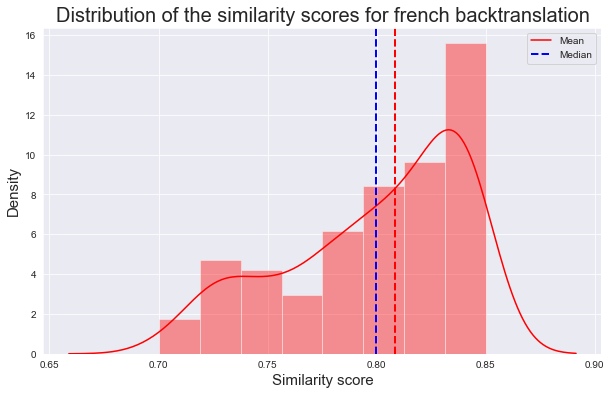

In [ ]:
# Plot a fancy colorful histogram distribution of the similarity scores
# Show the mean and median of the similarity scores on the plot. Show the actual value of the mean and median on the plot.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.distplot(label_1["similarity_score"], color="red")
plt.axvline(label_1["similarity_score"].mean(), color="blue", linestyle="dashed", linewidth=2)
plt.axvline(label_1["similarity_score"].median(), color="red", linestyle="dashed", linewidth=2)


plt.title("Distribution of the similarity scores for french backtranslation", fontsize=20)
plt.xlabel("Similarity score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend({"Mean": label_1["similarity_score"].mean(),
            "Median": label_1["similarity_score"].median(),
            })


plt.show()

#



We want to ensure that the backtranslated data are not too similar because if too similar then the model will not learn anything new. We can use the cosine similarity to measure the similarity between the original and backtranslated data. Since the cosine similarity was high, we added a new backtranslation processs

Duplicating the minority class in the "Don't Patronize Me" dataset for NLP model training may not be the best approach for improving model performance. Here's why:

It can lead to overfitting: By duplicating the minority class, you are artificially increasing the number of samples in the minority class, which can lead to overfitting of the model. Overfitting occurs when the model becomes too complex and fits the training data too closely, resulting in poor performance on new, unseen data.

It may not reflect the true distribution of the data: Duplicating the minority class does not accurately reflect the true distribution of the data, which can lead to biased or inaccurate model predictions.

It may not address the root cause of the class imbalance: Class imbalance can be caused by a variety of factors, such as data collection methods or the underlying distribution of the target variable. Duplicating the minority class does not address these underlying factors and may not result in significant performance improvements.

Instead of duplicating the minority class, a better approach to address class imbalance in NLP models is to use techniques such as undersampling, oversampling, or a combination of both. For example, undersampling randomly removes samples from the majority class, while oversampling randomly duplicates samples from the minority class. There are also more advanced techniques, such as Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples for the minority class based on the existing samples. These techniques can help to balance the class distribution and improve the performance of the model.




In [ ]:
# Only keep the examples with a similarity score between 0.7 and 0.85
label_1_french = label_1#[(label_1["similarity_score"] > 0.7) & (label_1["similarity_score"] < 0.9)]

print("Backtranslating to french resulted in :", len(label_1_french),'new data points')

# Drop the text and similarity_score columns and rename the back_translated_text column to text
label_1_french_cleaned = label_1_french.drop(["text", "similarity_score"], axis=1)
label_1_french_cleaned.rename(columns={"back_translated_text": "text"}, inplace=True)

# below is the cleaned backtranslated data for label 1. It consists of 216 new data points
label_1_french_cleaned


Backtranslating to french resulted in : 216 new data points


,par_id,community,label,text
1,4136,homeless,1,Durban Homeless Communities Reconciliation Luncheon
2,10352,poor-families,1,"The immediate problem that arose next was how to help the unfortunate couple, since neither of them had birth certificates, marriage certificates or even identity cards. Officer Samurdhi Dhanapala lamented how agonizing it was for him to endure, when he met the majority of the poor families in the village who did not even have ID cards to help them officially."
6,6027,homeless,1,"As a member of Care of Hope, Barnett regularly provides food to homeless people cared for by the foundation. However , she does not mind having to cook to feed the homeless and needy , she says , because it is basically something that is already hers ."
7,9343,hopeless,1,"""Lougene has this message for others who may still be addicted to illegal drugs: ''Don't be desperate because there is hope. You can always change. That's why every time I see on TV drug addicts and traffickers who were killed, I think they should have been given a chance to change by bringing them to a place like this."
8,1231,homeless,1,"A harrowing journey Night is falling early in this part of Morocco now and a cold winter is looming, prompting homeless Africans to try their luck before conditions worsen, and amid sometimes harsh treatment from authorities."
...,...,...,...,...
764,1637,poor-families,1,"Aruna Gopinath (AG): Members of these groups are generally vulnerable and gullible. Most of them come from troubled homes, poor families or have not received an adequate education. Recruiters target these people and promise them a better life, either in this life or in the hereafter."
769,6364,refugee,1,"""An organization representing Kashmiri pundits on Saturday demanded that the Center announce a smart city in Kashmir for displaced community members living a life as ''refugees in their own country'""."
771,6007,poor-families,1,"Although the government has taken the initiative to allow ultra poor families to purchase 30 kg of rice at Tk 10 per kg per month during the dry season under its fair price card scheme, many creditworthy families and have become the beneficiaries in four villages of the district."
778,2068,disabled,1,"It aims to raise awareness of the church for people with disabilities in their congregations and throughout Jamaica, and will see it improve physical accessibility to its buildings and provide training, employment and committee/board membership to members with disabilities."


In [ ]:
#merge the new data with the training set
training_set1_backtranslate_french = pd.concat([trdf1, label_1_french_cleaned])
#print the number of examples in the minority class and the majority class and specify the increase in the minority class
print("Number of examples in the minority class:", len(training_set1_backtranslate_french[training_set1_backtranslate_french["label"] == 1]))
print("Number of examples in the majority class:", len(training_set1_backtranslate_french[training_set1_backtranslate_french["label"] == 0]))
print("The number of examples in the minority class increased by:", len(label_1_french_cleaned))



Number of examples in the minority class: 1010
Number of examples in the majority class: 7581
The number of examples in the minority class increased by: 216


##### Back Translation with German

In [ ]:
# Repeat the same process for the German language
# Get the examples with label = 1
label_2= back_translate(training_set1_backtranslate_french,orig_lang='en', dest_lang='de')


C:\Users\Joshan\AppData\Local\Temp\ipykernel_20948\1823809026.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_1["back_translated_text"] = translated_text


In [ ]:
label_2

,par_id,community,text,label,back_translated_text
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1,"Under the scheme, between 1920 and 1974, an es..."
1,4136,homeless,Durban 's homeless communities reconciliation ...,1,Durban Homeless Communities Reconciliation Lun...
2,10352,poor-families,The next immediate problem that cropped up was...,1,The next immediate problem that arose was how ...
3,8279,vulnerable,Far more important than the implications for t...,1,Far more important than the impact on the econ...
4,1164,poor-families,To strengthen child-sensitive social protectio...,1,Strengthen child-sensitive social protection s...
...,...,...,...,...,...
764,1637,poor-families,Aruna Gopinath (AG): Members of these groups a...,1,Aruna Gopinath (AG): Members of these groups a...
769,6364,refugee,"""An organization representing Kashmiri pundits...",1,"""An organization representing Kashmiri experts..."
771,6007,poor-families,Although the government has taken the initiati...,1,Although the government has taken the initiati...
778,2068,disabled,It aims to raise awareness of the church for p...,1,It aims to raise awareness of the church for p...


In [ ]:
# display  row 5 from the dataframe
display(label_2.iloc[0]['text'])
display(label_2.iloc[0]['back_translated_text'])
print("The similarity score is:", label_2.iloc[0]['similarity_score'])

#display the lowest similarity score and its sentence
# show the complete sentence
pd.set_option('display.max_colwidth', None)

pd.set_option('display.width', None)

display(label_2[label_2['similarity_score'] == label_2['similarity_score'].min()]['text'])
display(label_2[label_2['similarity_score'] == label_2['similarity_score'].min()]['back_translated_text'])

print("The similarity score is:", label_2[label_2['similarity_score'] == label_2['similarity_score'].min()]['similarity_score'])


'The scheme saw an estimated 150,000 children from poor families being sent to parts of the British Empire between 1920 and 1974 , by religious orders and charities who said they would lead better lives .'

'Under the scheme, between 1920 and 1974, an estimated 150,000 children from poor families were sent to parts of the British Empire by religious orders and charities who said they would have a better life.'

The similarity score is: 0.8974358974358978


429    """ We are working with an aim to build a country where there would be no poverty , none would remain homeless , none would die without treatment , "" Sheikh Hasina said ."
Name: text, dtype: object

429    ""We work with the goal of building a country where there is no poverty, no one is left homeless, no one dies without treatment," said Sheikh Hasina.
Name: back_translated_text, dtype: object

The similarity score is: 429    0.422577
Name: similarity_score, dtype: float64


In [ ]:
# Add the similarity scores to the dataframe label_1 using the function cosine_similarity_sentences
label_2["similarity_score"] = label_2.apply(lambda x: cosine_similarity_sentences(x["text"], x["back_translated_text"]), axis=1)
label_2


C:\Users\Joshan\AppData\Local\Temp\ipykernel_20948\153164676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_2["similarity_score"] = label_2.apply(lambda x: cosine_similarity_sentences(x["text"], x["back_translated_text"]), axis=1)


,par_id,community,text,label,back_translated_text,similarity_score
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1,"Under the scheme, between 1920 and 1974, an es...",0.897436
1,4136,homeless,Durban 's homeless communities reconciliation ...,1,Durban Homeless Communities Reconciliation Lun...,0.800000
2,10352,poor-families,The next immediate problem that cropped up was...,1,The next immediate problem that arose was how ...,0.852980
3,8279,vulnerable,Far more important than the implications for t...,1,Far more important than the impact on the econ...,0.878543
4,1164,poor-families,To strengthen child-sensitive social protectio...,1,Strengthen child-sensitive social protection s...,0.929164
...,...,...,...,...,...,...
764,1637,poor-families,Aruna Gopinath (AG): Members of these groups a...,1,Aruna Gopinath (AG): Members of these groups a...,0.983051
769,6364,refugee,"""An organization representing Kashmiri pundits...",1,"""An organization representing Kashmiri experts...",0.966667
771,6007,poor-families,Although the government has taken the initiati...,1,Although the government has taken the initiati...,0.955433
778,2068,disabled,It aims to raise awareness of the church for p...,1,It aims to raise awareness of the church for p...,0.916271


c:\Users\Joshan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


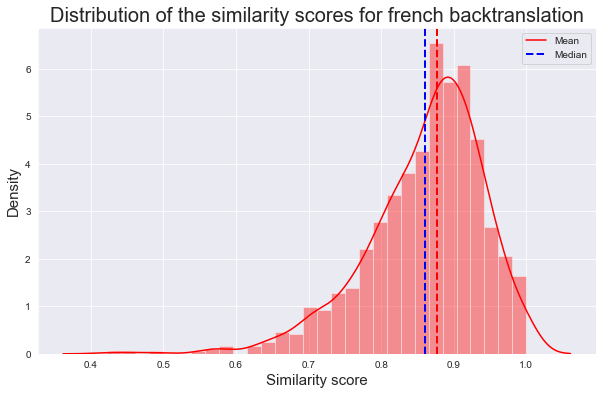

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.distplot(label_2["similarity_score"], color="red")
plt.axvline(label_2["similarity_score"].mean(), color="blue", linestyle="dashed", linewidth=2)
plt.axvline(label_2["similarity_score"].median(), color="red", linestyle="dashed", linewidth=2)


plt.title("Distribution of the similarity scores for french backtranslation", fontsize=20)
plt.xlabel("Similarity score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend({"Mean": label_2["similarity_score"].mean(),
            "Median": label_2["similarity_score"].median(),
            })


plt.show()

In [ ]:
# Only keep the examples with a similarity score between 0.7 and 0.85

label_2_german=label_2#[(label_2["similarity_score"] > 0.7) & (label_2["similarity_score"] < 0.9)]

# Drop the text and similarity_score columns and rename the back_translated_text column to text
label_2_german_cleaned = label_2_german.drop(["text", "similarity_score"], axis=1)
label_2_german_cleaned.rename(columns={"back_translated_text": "text"}, inplace=True)

# below is the cleaned backtranslated data for label 1. It consists of 216 new data points
label_2_german_cleaned

,par_id,community,label,text
0,4341,poor-families,1,"Under the scheme, between 1920 and 1974, an estimated 150,000 children from poor families were sent to parts of the British Empire by religious orders and charities who said they would have a better life."
1,4136,homeless,1,Durban Homeless Communities Reconciliation Luncheon
2,10352,poor-families,1,"The next immediate problem that arose was how to help the unhappy couple since neither of them had a birth certificate, marriage certificate or even an ID card. The samurdhi officer Dhanapala complained and explained how excruciating it was for him to endure when he found that the majority of the poor families in the village did not even have an identity card to officially help them."
3,8279,vulnerable,1,"Far more important than the impact on the economic gods (is the dollar up or down?), last night's result will also mean that many, many vulnerable New Zealanders will have better lives over the next three years."
4,1164,poor-families,1,"Strengthen child-sensitive social protection systems, including cash transfer programs that directly help poor families pay for food, health care, education and other services that protect children from the effects of poverty and improve their chances of breaking the cycle in their own lives."
...,...,...,...,...
764,1637,poor-families,1,"Aruna Gopinath (AG): Members of these groups are generally vulnerable and gullible. Most of them come from troubled backgrounds, poor families or have not received an adequate education. Recruiters target these people and promise them a better life, either in this life or in the hereafter."
769,6364,refugee,1,"""An organization representing Kashmiri experts on Saturday demanded that the center announce a smart city in Kashmir for displaced community members living life as 'refugees in their own country.'"""
771,6007,poor-families,1,"Although the government has taken the initiative to allow ultra-poor families to buy 30 kg of rice at Tk 10 per kg per month during the dry season under its fair price card system, many creditworthy families in four villages in the district have become the beneficiaries."
778,2068,disabled,1,"It aims to raise awareness of the church for people with disabilities in its communities and across Jamaica and will see it improve the physical accessibility of its buildings and provide education, employment and committee/board membership to members with disabilities."


In [ ]:
# Count and print the number of duplicates in the label_2_german_cleaned dataframe
print("Number of duplicates in the dataframe:", label_2_german_cleaned.duplicated().sum())

# Drop the duplicates
label_2_german_cleaned.drop_duplicates(inplace=True)
print('Duplicates removed =', label_2_german_cleaned.duplicated().sum())


Number of duplicates in the dataframe: 0
Duplicates removed = 0


In [ ]:
#merge the new data with the training set
training_set1_backtranslate_french_german = pd.concat([training_set1_backtranslate_french, label_2_german_cleaned])

#print the number of examples in the minority class and the majority class and specify the increase in the minority class
print("Number of examples in the majority class:", len(training_set1_backtranslate_french_german[training_set1_backtranslate_french_german["label"] == 0]))

print("Number of examples in the minority class:", len(training_set1_backtranslate_french_german[training_set1_backtranslate_french_german["label"] == 1]))
print("The number of examples in the minority class increased by:", len(label_2_german_cleaned))


Number of examples in the majority class: 7581
Number of examples in the minority class: 2017
The number of examples in the minority class increased by: 1007


## Style Transfer
This is not a good idea for this dataset as the style of the text helps determine the label. For example, the text "I am not a fan of this" is not patronising but the style of the text is patronising. Therefore, we will not use this technique.

## SMOTE
This method involves creating synthetic samples for the minority class by interpolating between existing samples. SMOTE works by finding the k-nearest neighbors of each minority class sample and creating new samples along the lines between these neighbors. SMOTE can help to address the overfitting issue associated with random oversampling.

In [ ]:
# %pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

df_oversample=training_set1_backtranslate_french_german.copy()

# Separate majority and minority classes
df_majority = df_oversample[df_oversample.label==0]
df_minority = df_oversample[df_oversample.label==1]


# Separate features and target variable
X = training_set1_backtranslate_french_german['text']#.drop('label', axis=1)
y = training_set1_backtranslate_french_german['label']




# Instantiate SMOTE
smote = SMOTE()

# Convert the text data into numerical representations using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)


# Apply SMOTE to upsample the minority class
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)


# Convert the numerical representations back to text data
X_resampled_text = vectorizer.inverse_transform(X_resampled)
X_resampled_text = [' '.join(words) for words in X_resampled_text]

# Create a new dataframe with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled_text), pd.DataFrame(y_resampled, columns=['label'])], axis=1)

                                    

In [ ]:
df_resampled

,0,label
0,lives better lead would they said who charities orders religious by 1974 and 1920 between empire british of parts to sent being families poor from children 000 150 estimated an saw scheme the,1
1,lunch reconciliation communities homeless durban,1
2,officially id possess not did village in majority across came he when bear him for it agonizing explaining lamented dhanapala officer samurdhi card identity even or marriage certificate birth possessed them neither as couple unfortunate assist how was up cropped that problem immediate next of to families poor an the,1
3,least at years three over life have zealanders new vulnerable many mean also will outcome night last down dollar is gods economy implications than important more far for or up next better the,1
4,own cycle breaking chances their improve poverty impact protect services other education care health food pay help directly programmes transfer cash including systems protection social sensitive child strengthen in for that lives and of to families poor from children the,1
...,...,...
15157,an 000 from poor by said that up or for came across not will mean many new have at including food other services improve are be there were been journey now before conditions authorities those all these but state african abuse like make poorest had we give point added no death get budget plan groups most refugees well violence its country government just risk if month so power one into after long saudi arabia thousands home each city local back willing us number year here ago told work while despite areas until sea hard agency according mostly appear countries war africa abroad die exiled hunger solution 2016 days 15 face says finding restore united nations yemen states iran reuters fighting clothes red used increasingly refugee men growing center migrant wealthy province facility bought small strewn desperately migrants supplies southern 2015 aim rising itself deportation hundreds fleeing hit torn arab east move leaving movement meager official fired stopped jail desperate ministry neighboring whom caught recently priority officials 600 bread roll dangers coalition handing lower space tip iceberg al makeshift hazards prevented risks horn tens treacherous impoverished gulf detained yemeni await armed soldiers warehouse basic djibouti amounts declined deport arabian peninsula transit route unsafe descended drown perilous multiple assault extortion criminal networks stemming unhcr traveling aden steadily 117 92 khaled elwany oversaw arrested checkpoints interior refusing cooperate relocate allies aligned houthi nominally controls crunch rivalries reside salaries chaos frightened subsisting savings washing rubbish outdoor the to parts of and who they communities was as it when he in more than is their hope people on has hopeless with our much man about his show leader out through called projects residents catch development gave metropolitan during democracy roads status several civil various visited broken hearts glimpse walked enhancing name history divided connected servants tour editors governor popularity port harcourt connecting wike bridges comforted artisans hoi polloi turned greet rocks kilometers hailed engraved universally droves affectionately retirees,1
15158,new hopeless the of and not is on this with homelessness my whole one only generation tribe fate me am walking wounded anguish ahmed nostalgia pathway caravan souls ashfaq,1
15159,children said it for when he at born time me nightmare the to by was over women street on man disabled city talking weekend shebesh representative captured kneeling nairobi passer,1
15160,from to and they homeless that it for is last are has hungry with attention victims its full government receive feeding injustice caring sad arts artists concerns ranging the 000 of in young fate hands immigrants undocumented congress nearly 790 deeply divided lies,1


In [ ]:
#print the number of examples in the minority class and the majority class and specify the increase in the minority class for the resampled data set df_resampled
print("Number of examples in the majority class:", len(df_resampled[df_resampled["label"] == 0]))
print("Number of examples in the minority class:", len(df_resampled[df_resampled["label"] == 1]))




Number of examples in the majority class: 7581
Number of examples in the minority class: 7581


The new data generated by SMOTE may not make logical sense as it is generated based on the existing minority samples, and it may not accurately reflect the true distribution of the data. Additionally, the generated data may introduce biases and noise into the dataset. However, the goal of using SMOTE is to improve the performance of the model on the minority class by creating synthetic examples, so it can be a useful technique to balance class distributions and improve model performance. It's important to carefully evaluate the results and test the model on unseen data to ensure that the synthetic examples are not introducing errors or bias.





In [ ]:
# label the column in df_resampled as text
df_resampled.rename(columns={0: "text"}, inplace=True)
df_resampled.head(2)

,text,label
0,lives better lead would they said who charities orders religious by 1974 and 1920 between empire british of parts to sent being families poor from children 000 150 estimated an saw scheme the,1
1,lunch reconciliation communities homeless durban,1


# Running models on augmented data

### 1. Running SMOTE Upsampled data

In [ ]:
# Run balanced class on Roberta

#Read the csv file
df_resampled_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/df_resampled.csv")
df_resampled_data

df_resampled_data.value_counts('label')

label
0    7581
1    7581
dtype: int64

In [ ]:
# Run Roberta Base case on balanced data
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(df_resampled_data[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/15162 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1896 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.11194895591647332
recall： 0.9698492462311558
f1_score: 0.20072802912116483


### 2. Running Backtranslation (french + German)

In [ ]:
# Run back_translation class on Roberta

#Read the csv file
back_translation_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/back_translation_german_french.csv")
back_translation_data

back_translation_data.value_counts('label')



label
0    7581
1    3112
dtype: int64

In [ ]:
# downsample negative instances
pcldf = back_translation_data[back_translation_data.label==1]
npos = len(pcldf)
print(npos)
class_ratio=1

training_set1 = pd.concat([pcldf,back_translation_data[back_translation_data.label==0][:npos*class_ratio]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(back_translation_data[back_translation_data.label==0]) - len(training_set1[training_set1.label==0])}')

3112
1    3112
0    3112
Name: label, dtype: int64
Number of negative instances downsampled: 4469


In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(training_set1[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6224 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/778 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.3526570048309179
recall： 0.7336683417085427
f1_score: 0.4763458401305057


### 3. Running Roberta on backtranslation (French)

In [ ]:
# Run back_translation class on Roberta

#Read the csv file
back_translation_french_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/backtranslate_french.csv")
back_translation_french_data

back_translation_french_data.value_counts('label')

label
0    7581
1    1578
dtype: int64

In [ ]:
# downsample negative instances
pcldf = back_translation_french_data[back_translation_french_data.label==1]
npos = len(pcldf)
print(npos)
class_ratio=2
training_set1 = pd.concat([pcldf,back_translation_french_data[back_translation_french_data.label==0][:npos*class_ratio]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(back_translation_french_data[back_translation_french_data.label==0]) - len(training_set1[training_set1.label==0])}')

1578
0    3156
1    1578
Name: label, dtype: int64
Number of negative instances downsampled: 4425


In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(training_set1[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/4734 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.4160839160839161
recall： 0.5979899497487438
f1_score: 0.49072164948453617


###  3. Running Roberta on backtranslation (French+german+portugese)

In [ ]:
# Run back_translation class on Roberta

#Read the csv file
back_translation_french_german_portugese_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/back_translation_german_french_portugese.csv")
back_translation_french_german_portugese_data

back_translation_french_german_portugese_data.value_counts('label')

label
0    7581
1    6075
dtype: int64

In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(back_translation_french_german_portugese_data[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

  0%|          | 0/13656 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1707 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.581081081081081
recall： 0.4321608040201005
f1_score: 0.49567723342939474


### 3. Running Roberta on backtranslation (French+noise)

In [ ]:
# Run back_translation class on Roberta

#Read the csv file
back_translation_french_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/backtranslate_french_0.52.csv")
back_translation_french_data

back_translation_french_data.value_counts('label')

label
0    7581
1    1588
dtype: int64

In [ ]:
# downsample negative instances
pcldf = back_translation_french_data[back_translation_french_data.label==1]
npos = len(pcldf)
print(npos)
class_ratio=2
training_set1 = pd.concat([pcldf,back_translation_french_data[back_translation_french_data.label==0][:npos*class_ratio]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(back_translation_french_data[back_translation_french_data.label==0]) - len(training_set1[training_set1.label==0])}')

1588
0    3176
1    1588
Name: label, dtype: int64
Number of negative instances downsampled: 4405


In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(training_set1[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

  0%|          | 0/4764 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.4299363057324841
recall： 0.678391959798995
f1_score: 0.5263157894736842


# Random swaps

In [ ]:
# Run random swaps class on Roberta

#Read the csv file
random_swap_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/random_swap.csv")
random_swap_data=random_swap_data#+back_translation_french_data

random_swap_data.value_counts('label')

label
0    15162
1     3156
dtype: int64

In [ ]:
# downsample negative instances
pcldf = random_swap_data[random_swap_data.label==1]
npos = len(pcldf)
print(npos)
class_ratio=2
training_set1 = pd.concat([pcldf,random_swap_data[random_swap_data.label==0][:npos*class_ratio]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(random_swap_data[random_swap_data.label==0]) - len(training_set1[training_set1.label==0])}')

3156
0    6312
1    3156
Name: label, dtype: int64
Number of negative instances downsampled: 8850


In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(training_set1[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

  0%|          | 0/9468 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1184 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.4172661870503597
recall： 0.5829145728643216
f1_score: 0.4863731656184487


#Back translations german+french


In [ ]:
# Run back_translation class on Roberta

#Read the csv file
back_translation_french_german_portugese_cleaned_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/back_translations_german_french_old.csv")
back_translation_french_german_portugese_cleaned_data

back_translation_french_german_portugese_cleaned_data.value_counts('label')

label
0    7581
1    2017
dtype: int64

In [ ]:
# downsample negative instances
pcldf = back_translation_french_german_portugese_cleaned_data[back_translation_french_german_portugese_cleaned_data.label==1]
npos = len(pcldf)
print(npos)
class_ratio=2
training_set1 = pd.concat([pcldf,back_translation_french_german_portugese_cleaned_data[back_translation_french_german_portugese_cleaned_data.label==0][:npos*class_ratio]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(back_translation_french_german_portugese_cleaned_data[back_translation_french_german_portugese_cleaned_data.label==0]) - len(training_set1[training_set1.label==0])}')

2017
0    4034
1    2017
Name: label, dtype: int64
Number of negative instances downsampled: 3547


In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(training_set1[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/6051 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.4950980392156863
recall： 0.507537688442211
f1_score: 0.501240694789082


# Backtranslate + Random downsample + SMOTE Upsample
* The below code was first backtranslated, then the majority class was downsampled, and the minority class was upsampled

In [ ]:
# Run random swaps class on Roberta

#Read the csv file
backtranslate_SMOTE_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/backtranslate_SMOTE_upsampled.csv")

backtranslate_SMOTE_data.value_counts('label')

label
0    3176
1    3176
dtype: int64

In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model
task1_model.train_model(backtranslate_SMOTE_data[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/6352 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/794 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.22930800542740842
recall： 0.8492462311557789
f1_score: 0.36111111111111116


In [ ]:
# Run back_translation class on Roberta

#Read the csv file
back_translation_french_german_portugese_cleaned_data = pd.read_csv("/content/drive/MyDrive/NLPClassification_40/back_translation_german_french_pt_afk_la_ja_hi_tl_cy.csv")
back_translation_french_german_portugese_cleaned_data

back_translation_french_german_portugese_cleaned_data.value_counts('label')

label
0    7581
1    7535
dtype: int64

In [ ]:
# downsample negative instances
pcldf = back_translation_french_german_portugese_cleaned_data[back_translation_french_german_portugese_cleaned_data.label==1]
npos = len(pcldf)
print(npos)
class_ratio=1
training_set1 = pd.concat([pcldf,back_translation_french_german_portugese_cleaned_data[back_translation_french_german_portugese_cleaned_data.label==0][:npos*class_ratio]])

#print the number of positive and negative instances in the training set
print(training_set1.label.value_counts())

# Print by how much the negative instances are downsampled in absolute terms
print(f'Number of negative instances downsampled: {len(back_translation_french_german_portugese_cleaned_data[back_translation_french_german_portugese_cleaned_data.label==0]) - len(training_set1[training_set1.label==0])}')

7535
1    7535
0    7535
Name: label, dtype: int64
Number of negative instances downsampled: 46


In [ ]:
# Run Roberta Base case on backtranslated data only
torch.manual_seed(2)
task1_model_args = ClassificationArgs(num_train_epochs=1, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)
task1_model = ClassificationModel("bert",
                                  'bert-base-uncased',
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)
# train model

task1_model.train_model(back_translation_french_german_portugese_cleaned_data[['text', 'label']])
# run predictions
preds_task1, _ = task1_model.predict(tedf1.text.tolist())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/15116 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1890 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('precision: ' + str(precision_score(tedf1.label.values, preds_task1)))
print( 'recall： ' + str(recall_score(tedf1.label.values, preds_task1)))
print('f1_score: ' + str(f1_score(tedf1.label.values, preds_task1)))

precision: 0.49361702127659574
recall： 0.5829145728643216
f1_score: 0.5345622119815668


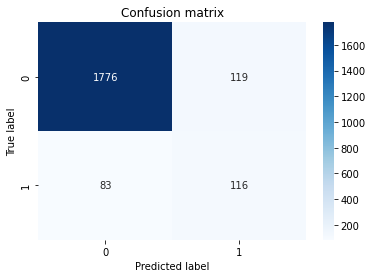

In [ ]:
# Display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(tedf1.label.values, preds_task1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Generate predictions

In this example, our code will just generate a bunch of random predictions for both subtasks.

In [ ]:
# first, we need to create the res/ and ref/ folders, which the evaluator expects
!mkdir ref res

mkdir: cannot create directory ‘ref’: File exists
mkdir: cannot create directory ‘res’: File exists


In [ ]:
dpm.load_test()

In [ ]:
# random predictions for task 1
preds_task1 = [[random.randint(0,1)] for k in range(0,len(dpm.test_set))]
labels2file(preds_task1, os.path.join('res/', 'task1.txt'))

In [ ]:
# random predictions for task 2
preds_task2 = [[random.choice([0,1]) for k in range(7)] for k in range(0,len(dpm.test_set))]
labels2file(preds_task2, os.path.join('res/', 'task2.txt'))

# Evaluate predictions

After generating two prediction files (`task1.txt` and `task2.txt`), we can just call the scorer (`evaluation.py`), which will generate a `scores.txt` file.

## Get gold labels

We will use the gold labels of the training set and compare our random predictions to them.

In [ ]:
# for subtask 1 (we convert our list of labels into a list of lists to make 
# it compatible with the labels2file function)
labels2file(dpm.train_task1_df.label.apply(lambda x:[x]).tolist(), os.path.join('ref/', 'task1.txt'))
# and for subtask 2
labels2file(dpm.train_task2_df.label.tolist(), os.path.join('ref/', 'task2.txt'))

## Call task scorer and print results

In [ ]:
# Now, we can just call the official scorer, which takes an input_directory and an output_directory
# as arguments. In this example, both will be the root directory of this notebook.
!python3 evaluation.py . .

In [ ]:
# The scorer generated a results file called "scores.txt". 
# We can now see the performance of a random baseline on the training set.
!cat scores.txt

task1_precision:0.09203054630898766
task1_recall:0.473313192346425
task1_f1:0.1540983606557377
task2_unb:0.301255230125523
task2_sha:0.5839536807278742
task2_pre:0.291350531107739
task2_aut:0.2896174863387978
task2_met:0.48283038501560877
task2_com:0.2952243125904486
task2_the:0.06177606177606177
task2_avg:0.3294296696688647
